# Lab 7: Set current, measure voltage
### Jonathan Kelley

It is often useful to understand the electrical behavior of circuit components. For components with behaviors 


We want to use the drop in voltage between the source voltage and output voltage of the lower op-amp to measure the resulting voltage drop across some unknown components ("Black Box").

Both op-amps will be wired in negative feedback mode meaning no current will be drawn by the inputs and the input voltages will be equal.


$$ \frac{dV}{dt} = \frac{1}{c} I $$


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Blackbox: .1uF 

Voltage = [0.25, 0.75, 1, 1.5, 2.25]

dvdt = [1.681, 6.329, 8.642, 13.21, 18.73]



### Blackbox: LED

We are also interested in the electrical behavior of the LED - specifically the current draw in relation to the input voltage. 

By using the dual negative-feedback setup detailed earlier, we can determine the current through the circuit with reference to the input voltage generated by a square wave. By recording the voltage difference and measuring the output voltage, we can create a plot of current through the circuit against the input voltage.



Text(0.5, 0, 'Voltage (Volts)')

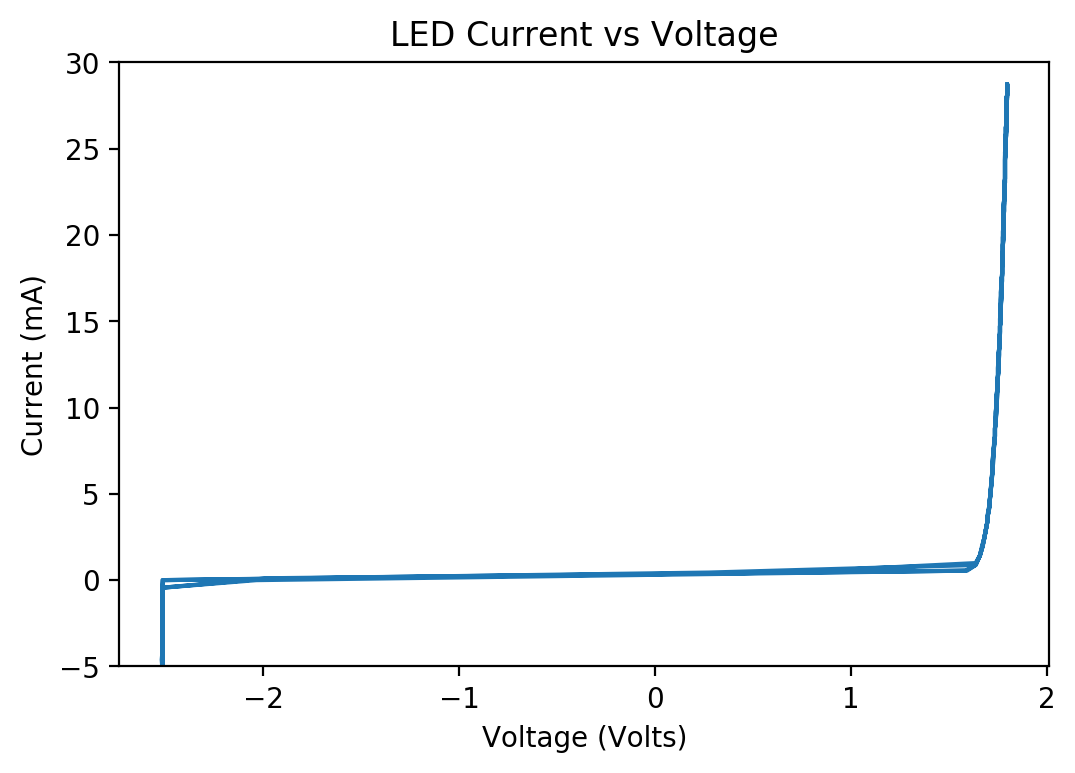

In [2]:
data = pd.read_csv("data/led_data.csv")
plt.figure(dpi = 200)

plt.plot(data['x'], data['y'])
plt.ylim((-5, 30))
plt.title("LED Current vs Voltage")
plt.ylabel("Current (mA)")
plt.xlabel("Voltage (Volts)")

In [16]:
data = pd.read_csv("data/rc_1.csv", skiprows = 9)
data.columns

Index(['Time (s)', 'Channel 1 (V)', 'Channel 2 (V)'], dtype='object')

In [18]:
data = pd.read_csv("data/lightlabxy.csv")
data.columns = pd.Index(['X', 'Y'])

In [ ]:
plt.figure(dpi = 200)
plt.plot(data['Y']*-1, data['X'])

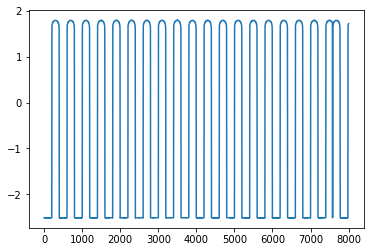

In [22]:
plt.plot(data['Y'])

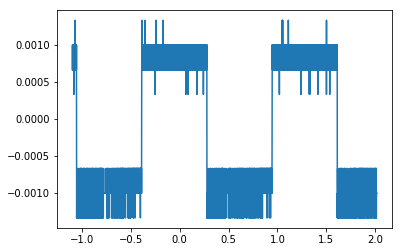

In [7]:
file = "data/"+filename  
#file = "data/rc_1.csv"
data = pd.read_csv(file, skiprows = 9)
#plt.figure(dpi = 200)
plt.plot(data['Time (s)'][:-1], np.diff(data['Channel 2 (V)']), label = filename[:-4])


In [8]:
dvdt = np.diff(data['Channel 2 (V)'])

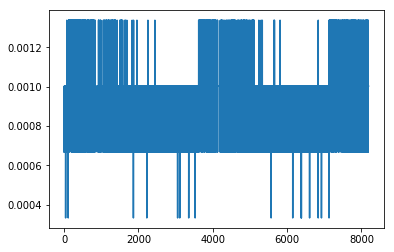

In [9]:
plt.plot(np.abs(dvdt))

In [10]:
np.median(np.abs(dvdt))

0.001002487404903274

No handles with labels found to put in legend.


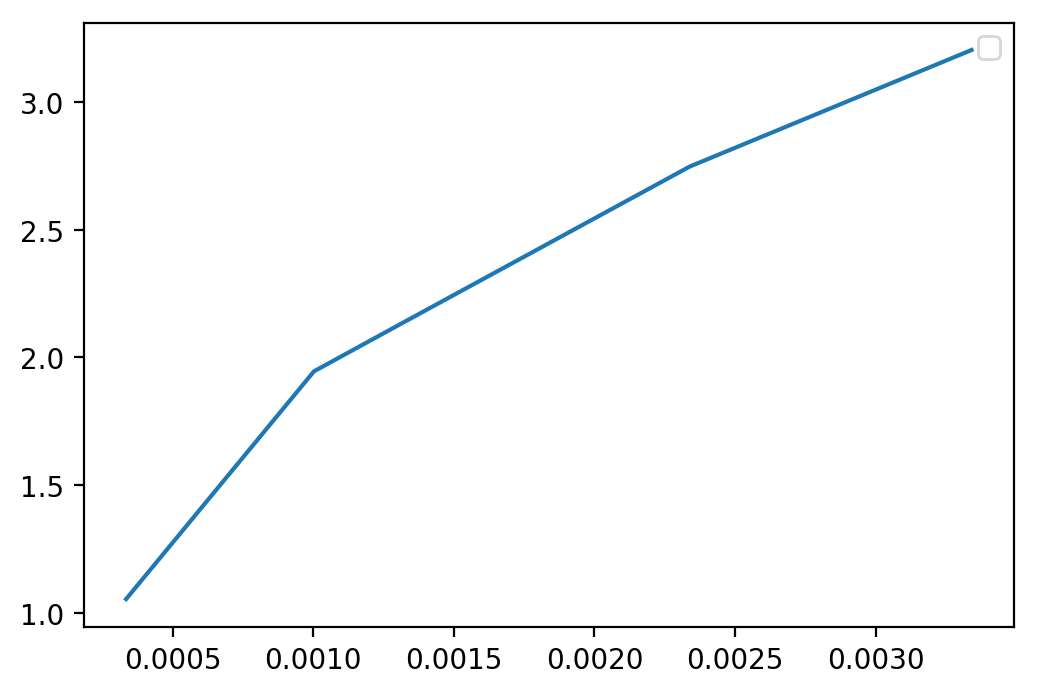

In [32]:
plt.figure(dpi = 200)
volts = []
dvdts = []

for filename in ['rc_2.csv', 'rc_3.csv', 'rc_4.csv', 'rc_5.csv', 'rc_1.csv' ]:
    file = "data/"+filename  
    #file = "data/rc_1.csv"
    data = pd.read_csv(file, skiprows = 9)
    #plt.figure(dpi = 200)
    #plt.plot(data['Time (s)'][:-1], np.diff(data['Channel 2 (V)']), label = filename[:-4])
    dvdt = np.diff(data['Channel 2 (V)'])
    dvdts.append(np.median(np.abs(dvdt)))
    
    volt = (data['Channel 2 (V)'])
    volts.append(np.median(np.abs(volt)))
    

#truevals = np.sort(vals)/1.9e-4
#x = truevals/(1/1e-6) * 1e6

plt.plot(dvdts, volts)
plt.legend()

In [20]:
import seaborn as sb

In [21]:
1/1e-6

1000000.0

In [30]:
dvdts

[0.0003341624683010913,
 0.003341624683010913,
 0.002339137278107861,
 0.0013366498732042542,
 0.001002487404903274]

In [31]:
volts

[1.0528094804316241,
 3.204147451354347,
 2.7475144384208425,
 2.1463561579470967,
 1.9452127701828943]

In [33]:
Voltage = [0.25, 0.75, 1, 1.5, 2.25]
dvdt = [1.681, 6.329, 8.642, 13.21, 18.73]

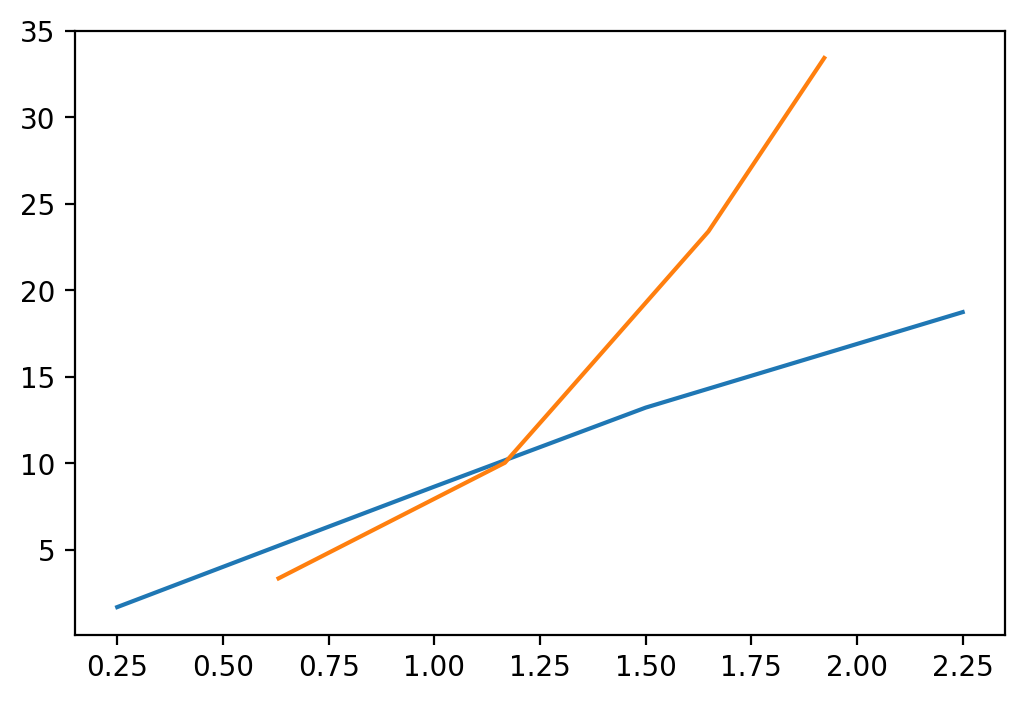

In [47]:
plt.figure(dpi = 200)
plt.plot(Voltage, dvdt)
plt.plot(np.array(volts) * .6, np.array(dvdts) * 1e4)

In [40]:
dvdts

[0.003341624683010913,
 0.002339137278107861,
 0.0013366498732042542,
 0.001002487404903274,
 0.0003341624683010913]

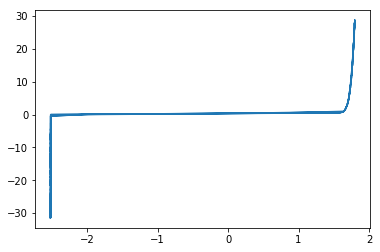

In [76]:
data = pd.read_csv("data/leddata.csv")
data.columns = pd.Index(["x", "y"])
xs = data['y'][:1000]
ys = -data['x'][:1000] * 30
data['x'] = xs
data['y'] = ys
#plt.figure(dpi = 200)

plt.plot(data['x'], data['y'])
#plt.plot(data['y'][:1000], -data['x'][:1000] * 30)
#plt.ylim((-5, 30))
#plt.title("LED Current vs Voltage")

In [77]:
data.to_csv("data/led_data.csv")